# Check the movement

In [1]:
from typing import Tuple

import seaborn as sns
import matplotlib.pyplot as plt

from param import *
from dataloader import UniformSegmentDataset, BaseDataset
from util import segment

data_list = ParamDir().data_list

## Median time of staying in one position

Text(0.5, 0.98, 'median time (s) of staying in one position')

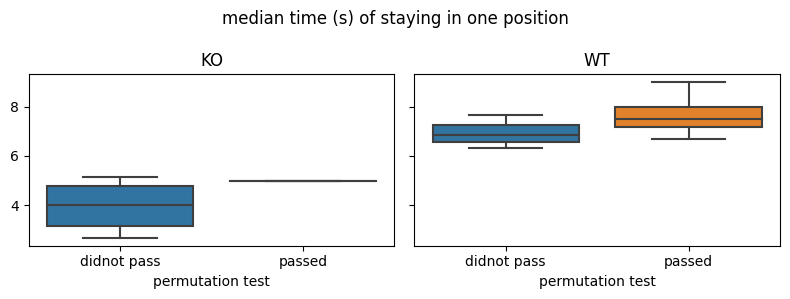

In [2]:
fig, axes = plt.subplots(figsize=(8,3), ncols=2, sharey=True, tight_layout=True)

KO_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" in  str(data_dir).split('/')[-1]]

segment_len_all = []
for i, data_dir in enumerate(KO_data_list):
    segment_len = []
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(ParamData().window_size, ParamData().K, ParamData().train_ratio)

    segment_ind = segment(dataset.y_train_base)
    segment_len.append(round((segment_ind[0]+1)/3, 2))
    for i in range(1, len(segment_ind)):
        segment_len.append(round((segment_ind[i]-segment_ind[i-1])/3, 2))
    segment_len_all.append([segment_len, data_name])
    

pass_res_KO = []
not_pass_res_KO = []
for item in segment_len_all:
    if item[1] in ["091317 OF CaMKII HKO M19-n1"]:
        pass_res_KO.append([np.median(item[0]), item[1]])
    else:
        not_pass_res_KO.append([np.median(item[0]), item[1]])
sns.boxplot([[i[0] for i in not_pass_res_KO], [i[0] for i in pass_res_KO]], ax=axes[0])
axes[0].set_title("KO")
axes[0].set_xticklabels(["didnot pass", "passed"])
axes[0].set_xlabel("permutation test")

WT_names = ["M45_042718_OF", "M46_042718_OF", "092217 OF CaMKII WT M29-n1"]
WT_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" not in  str(data_dir).split('/')[-1]]

segment_len_all = []
for i, data_dir in enumerate(WT_data_list):
    segment_len = []
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(ParamData().window_size, ParamData().K, ParamData().train_ratio)

    segment_ind = segment(dataset.y_train_base)
    segment_len.append(round((segment_ind[0]+1)/3, 2))
    for i in range(1, len(segment_ind)):
        segment_len.append(round((segment_ind[i]-segment_ind[i-1])/3, 2))
    segment_len_all.append([segment_len, data_name])
    

pass_res_WT = []
not_pass_res_WT = []
for item in segment_len_all:
    if item[1] not in WT_names:
        pass_res_WT.append([np.median(item[0]), item[1]])
    else:
        not_pass_res_WT.append([np.median(item[0]), item[1]])
sns.boxplot([[i[0] for i in not_pass_res_WT], [i[0] for i in pass_res_WT]], ax=axes[1])
axes[1].set_title("WT")
axes[1].set_xticklabels(["didnot pass", "passed"])
axes[1].set_xlabel("permutation test")

plt.suptitle("median time (s) of staying in one position")


In [3]:
print(f"passed: \n {pass_res_KO} \ndidnot pass: \n {not_pass_res_KO}")

passed: 
 [[5.0, '091317 OF CaMKII HKO M19-n1']] 
didnot pass: 
 [[2.67, '092217 OF CaMKII HKO M30-n1'], [4.67, '091317 OF CaMKII HKO M20-n1'], [3.33, 'CK_KO_RN1_OF'], [5.165, '090817 OF CaMKII HKO M22-n1']]


In [4]:
print(f"passed: \n {pass_res_WT} \ndidnot pass: \n {not_pass_res_WT}")

passed: 
 [[9.0, 'CK_WT_RN3_OF'], [6.67, 'M44_042718_OF'], [7.665, '092717 OF SERT WT M32-n1'], [7.33, '081117 OF B6J M27-n1']] 
didnot pass: 
 [[6.835, 'M45_042718_OF'], [6.33, 'M46_042718_OF'], [7.67, '092217 OF CaMKII WT M29-n1']]


## Average velocity throught the whole trial

Text(0.5, 0.98, 'average velocity (s) across the whole trial')

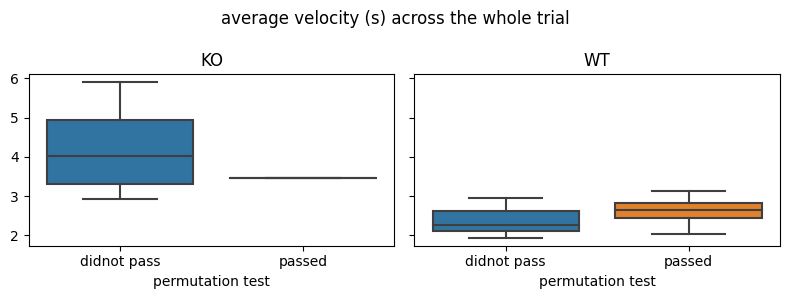

In [5]:
fig, axes = plt.subplots(figsize=(8,3), ncols=2, sharey=True, tight_layout=True)

KO_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" in  str(data_dir).split('/')[-1]]

vel_all = []
for i, data_dir in enumerate(KO_data_list):
    segment_len = []
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    vel_base = dataset.vel_base

    vel_all.append([vel_base, data_name])
    
pass_res_KO = []
not_pass_res_KO = []
for item in vel_all:
    if item[1] in ["091317 OF CaMKII HKO M19-n1"]:
        pass_res_KO.append([np.mean(item[0]), item[1]])
    else:
        not_pass_res_KO.append([np.mean(item[0]), item[1]])
sns.boxplot([[i[0] for i in not_pass_res_KO], [i[0] for i in pass_res_KO]], ax=axes[0])
axes[0].set_title("KO")
axes[0].set_xticklabels(["didnot pass", "passed"])
axes[0].set_xlabel("permutation test")

WT_names = ["M45_042718_OF", "M46_042718_OF", "092217 OF CaMKII WT M29-n1"]
WT_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" not in  str(data_dir).split('/')[-1]]

vel_all = []
for i, data_dir in enumerate(WT_data_list):
    segment_len = []
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    vel_base = dataset.vel_base

    vel_all.append([vel_base, data_name])
    
pass_res_WT = []
not_pass_res_WT = []
for item in vel_all:
    if item[1] not in WT_names:
        pass_res_WT.append([np.mean(item[0]), item[1]])
    else:
        not_pass_res_WT.append([np.mean(item[0]), item[1]])
sns.boxplot([[i[0] for i in not_pass_res_WT], [i[0] for i in pass_res_WT]], ax=axes[1])
axes[1].set_title("WT")
axes[1].set_xticklabels(["didnot pass", "passed"])
axes[1].set_xlabel("permutation test")

plt.suptitle("average velocity (s) across the whole trial")


In [6]:
print(f"passed: \n {pass_res_KO} \ndidnot pass: \n {not_pass_res_KO}")

passed: 
 [[3.4632067036786096, '091317 OF CaMKII HKO M19-n1']] 
didnot pass: 
 [[5.906163639064475, '092217 OF CaMKII HKO M30-n1'], [2.923099530390617, '091317 OF CaMKII HKO M20-n1'], [4.632129701551387, 'CK_KO_RN1_OF'], [3.426036048411569, '090817 OF CaMKII HKO M22-n1']]


In [7]:
print(f"passed: \n {pass_res_WT} \ndidnot pass: \n {not_pass_res_WT}")

passed: 
 [[2.5738921582972214, 'CK_WT_RN3_OF'], [3.1343809435122854, 'M44_042718_OF'], [2.0422807535892757, '092717 OF SERT WT M32-n1'], [2.7363718365579004, '081117 OF B6J M27-n1']] 
didnot pass: 
 [[2.2745522122330186, 'M45_042718_OF'], [2.9641301491204395, 'M46_042718_OF'], [1.9334184955781544, '092217 OF CaMKII WT M29-n1']]
